In [293]:
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [294]:
pwd

'c:\\Users\\johan\\OneDrive - Uppsala universitet\\Dokument\\Termin 6\\Examensarbete\\Examensarbete_analys\\Examensarbete_analys'

<h1>Inläsning, transformering och kontroll av data</h1>

In [295]:

df = pd.read_csv("data.csv", encoding="utf-8", delimiter = ",")

In [296]:
df = df.drop(df.index[:3])
df = df.reset_index(drop=True)

In [297]:
df.drop(columns="Tidstämpel", axis=1, inplace=True)

In [298]:
kolumner_att_konvertera = df.columns[:4]

# Konvertera datatypen för de valda kolumnerna till 'category'
df[kolumner_att_konvertera] = df[kolumner_att_konvertera].astype('category')


In [299]:
df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({
    "0-10 000": "liten",
    "10-50 000": "liten",
    "50-100 000": "medel",
    "100-200 000": "stor",
    "200 000+": "stor"
})

C:\Users\johan\AppData\Local\Temp\ipykernel_37072\2101176683.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({


<h1>Kategorisering</h1>

In [300]:
df_demografi = df.iloc[:,:6]

In [301]:
# Välj kolumnerna med index 19 till 27 (slutet är exklusivt så vi tar upp till 28)
utvalda_k = df.iloc[:, 17:29]
utvalda_k1 = df.iloc[:, 17:23]
utvalda_k2 = df.iloc[:, 23:29]
utvalda_a = df.iloc[:, 29:]
utvalda_a1 = df.iloc[:, 29:37]
utvalda_a2 = df.iloc[:, 37:]
utvalda_b = df.iloc[:, 6:17]
utvalda_b1_dark = df.iloc[:,[6,7,9]]
utvalda_b1_no_dark = df.iloc[:,[8,10]]
utvalda_b2 = df.iloc[:, 11:14]
utvalda_b3 = df.iloc[:, 14:17]

# Platta ut alla värden till en lång array och räkna ut medelvärde
medelvärde_k = utvalda_k.values.flatten().mean()
medelvärde_k1 = utvalda_k1.values.flatten().mean()
medelvärde_k2 = utvalda_k2.values.flatten().mean()
medelvärde_a = utvalda_a.values.flatten().mean()
medelvärde_a1 = utvalda_a1.values.flatten().mean()
medelvärde_a2 = utvalda_a2.values.flatten().mean()
medelvärde_b = utvalda_b.values.flatten().mean()
medelvärde_b1_dark = utvalda_b1_dark.values.flatten().mean()
medelvärde_b1_no_dark = utvalda_b1_no_dark.values.flatten().mean()
medelvärde_b2 = utvalda_b2.values.flatten().mean()
medelvärde_b3 = utvalda_b3.values.flatten().mean()

# Skapa ny DataFrame med en kolumn "K" och medelvärdet som enda värde
df_kategoriserad = pd.DataFrame({
                      'K': [medelvärde_k],
                      'K_grundläggande': [medelvärde_k1],
                      'K_integritet': [medelvärde_k2],
                      'A': [medelvärde_a],
                      'A_egen_data': [medelvärde_a1],
                      'A_gen_insamling': [medelvärde_a2],
                      'B': [medelvärde_b],
                      'B_bilder_dark': [medelvärde_b1_dark],
                      'B_bilder_no_dark': [medelvärde_b1_no_dark],
                      'B2_agerande': [medelvärde_b2],
                      'B3_aktivt agerande': [medelvärde_b3]
                      })

In [302]:
df_kategoriserad.head()

,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,3.816358,3.675926,3.95679,4.458333,4.384259,4.606481,4.207071,5.654321,5.138889,3.425926,2.919753


In [307]:

medel_k = df.iloc[:, 17:29].mean(axis=1).round(2)
medel_k1 = df.iloc[:, 17:23].mean(axis=1)
medel_k2 = df.iloc[:, 23:29].mean(axis=1)
medel_a = df.iloc[:, 29:].mean(axis=1)
medel_a1 = df.iloc[:, 29:37].mean(axis=1)
medel_a2 = df.iloc[:, 37:].mean(axis=1)
medel_b = df.iloc[:, 6:17].mean(axis=1)
medel_b1_dark = df.iloc[:,[6,7,9]].mean(axis=1)
medel_b1_no_dark = df.iloc[:,[8,10]].mean(axis=1)
medel_b2 = df.iloc[:, 11:14].mean(axis=1)
medel_b3 = df.iloc[:, 14:17].mean(axis=1)


df_resp_sum = pd.DataFrame({
                      'Kön': df.iloc[:,0],
                      'Årskurs': df.iloc[:,1],
                      'Program': df.iloc[:,2],
                      'Invånare': df.iloc[:,3],
                      'K': medel_k,
                      'K_grundläggande': medel_k1,
                      'K_integritet': medel_k2,
                      'A': medel_a,
                      'A_egen_data': medel_a1,
                      'A_gen_insamling': medel_a2,
                      'B': medel_b,
                      'B_bilder_dark': medel_b1_dark,
                      'B_bilder_no_dark': medel_b1_no_dark,
                      'B2_agerande': medel_b2,
                      'B3_aktivt agerande': medel_b3
                      })

In [308]:
df_resp_sum.head()

,Kön,Årskurs,Program,Invånare,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,Vill ej ange,Årskurs 3,Teknik,liten,3.08,3.000000,3.166667,3.083333,3.250,2.75,3.090909,2.666667,3.0,3.333333,3.333333
1,Man,Årskurs 3,Naturvetenskap,medel,3.25,1.833333,4.666667,5.500000,5.500,5.50,4.000000,7.000000,4.5,3.666667,1.000000
2,Man,Årskurs 3,Samhällsvetenskap,medel,1.58,2.166667,1.000000,4.833333,4.625,5.25,3.363636,7.000000,3.0,2.333333,1.000000
3,Kvinna,Årskurs 3,Naturvetenskap,liten,1.67,2.333333,1.000000,6.250000,6.000,6.75,4.090909,7.000000,7.0,2.333333,1.000000
4,Kvinna,Årskurs 3,Samhällsvetenskap,liten,2.33,1.166667,3.500000,4.666667,4.375,5.25,3.727273,7.000000,7.0,1.000000,1.000000


<h1>Demografi</h1>

In [309]:
df_demografi.head()

,Kön,Vilken årskurs går du i?,Vilket av följande beskriver bäst ditt program?,Hur många invånare har orten där du bor?,Jag känner till GDPR.,Jag litar på att hemsidor hanterar mina personuppgifter på ett ansvarsfullt sätt.
0,Vill ej ange,Årskurs 3,Teknik,liten,2.0,3.0
1,Man,Årskurs 3,Naturvetenskap,medel,5.0,5.0
2,Man,Årskurs 3,Samhällsvetenskap,medel,1.0,7.0
3,Kvinna,Årskurs 3,Naturvetenskap,liten,5.0,4.0
4,Kvinna,Årskurs 3,Samhällsvetenskap,liten,5.0,3.0


<module 'matplotlib' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

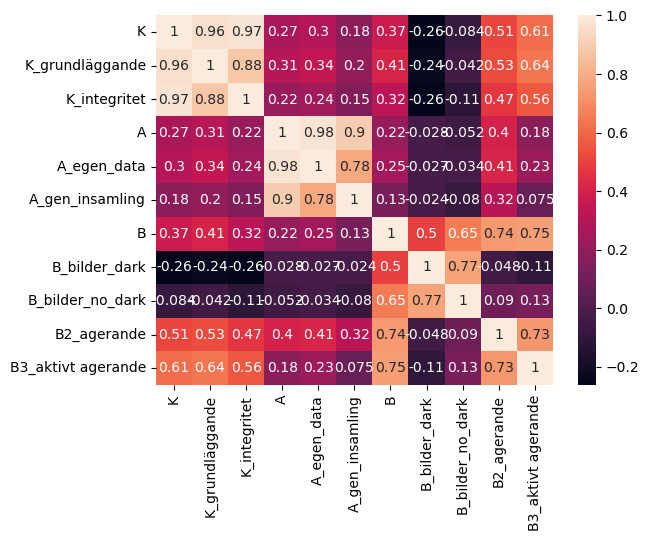

In [310]:
df_number = df_resp_sum.select_dtypes(include='number')
matrix = df_number.corr()
sns.heatmap(matrix,annot=True)
plt

<h1>Medelvärde av kategorier</h1>

<h1>Relabilitetstest</h1>

<h1>Korrelationstest</h1>

<h1>Regressionstest</h1>

<h1>T-test/ANOVA</h1>